In [33]:
import math
import copy as c
from datetime import datetime
import random
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import *
import pandas as pd
import sys
import csv
import json
import xlsxwriter
import pickle
import requests
import re
import seaborn as sns
from sklearn import linear_model
from word2number import w2n

1. Variance and std deviation
2. Covariance
3. Correlation
4. x[],y[] find the m and c
5. Draw the graph for 1.y=mx+c 2. Scatter plot (x,y)

In [1]:
def mean(x):
    mn=0
    for i in x:
        mn=i+mn
    return mn/len(x)

In [3]:
def var(x):
    sum=0
    var=0
    for i in x:
        sum=(i-mean(a))**2+sum
    return sum/len(x)
def std(x):
    return var(x)**0.5

In [4]:
def co_var(x,y):
    if len(x)==len(y):
        mx=mean(x)
        my=mean(y)
        sum=0
        for i in range(len(x)):
            sum=sum+(x[i]-mx)*(y[i]-my)
        return sum/len(x)
    else:
        return "Incorect input"

In [7]:
def corr(x,y):
    return co_var(x,y)/(std(x)*2.494438257849294)

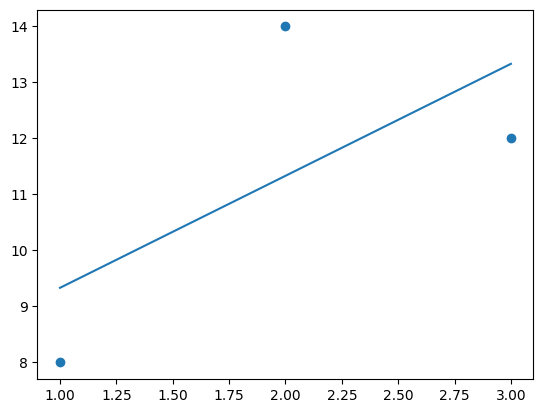

In [6]:
def slope(x,y):
    return co_var(x,y)/var(x)
def intercept(x,y):
    return mean(y)-slope(x,y)*mean(x)
import matplotlib.pyplot as plt
a=[1,2,3]
b=[8,14,12]
y_cap=[slope(a,b)*i+intercept(a,b) for i in a]
plt.plot(a,y_cap)
plt.scatter(a,b)

## Regression

### Linear regression

In [23]:
#que1
df=pd.read_csv(r"C:\Users\sahua\OneDrive\Documents\canada_per_capita_income.csv")
df.head()

,year,per_capita
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


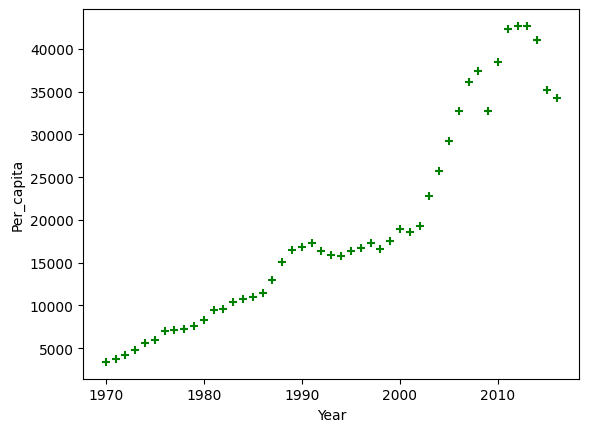

In [24]:
plt.xlabel("Year")
plt.ylabel("Per_capita")
plt.scatter(df.year,df.per_capita,color="green",marker="+")

In [25]:
reg= linear_model.LinearRegression()
reg.fit(df[["year"]],df.per_capita)

LinearRegression()

In [30]:
reg.predict([[1995]])

C:\Users\sahua\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([20577.06721385])

In [16]:
reg.coef_

array([828.46507522])

In [17]:
reg.intercept_

-1632210.7578554575

In [18]:
828.46507522*1995+-1632210.7578554575

20577.067208442604

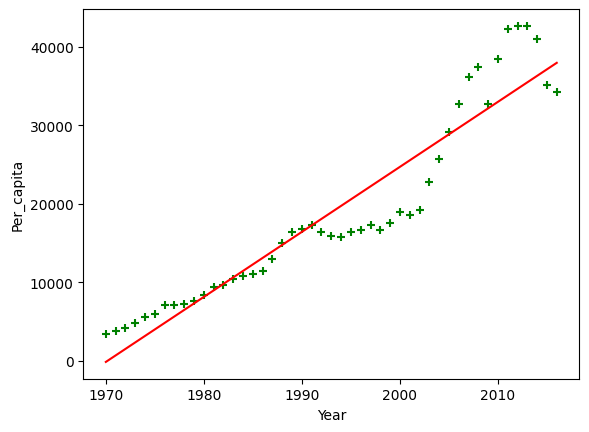

In [34]:
plt.xlabel("Year")
plt.ylabel("Per_capita")
plt.scatter(df.year,df.per_capita,color="green",marker="+")
plt.plot(df.year,reg.predict(df[['year']]),color="red")

In [66]:
#que2
df=pd.read_csv(r"C:\Users\sahua\OneDrive\Documents\Data Science\hiring.csv")
df.experience=df.experience.fillna("zero")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [67]:
df.experience = df.experience.apply(w2n.word_to_num)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [68]:
import math
mean_ts = math.floor(df['test_score(out of 10)'].mean())
df['test_score(out of 10)']=df['test_score(out of 10)'].fillna(mean_ts)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


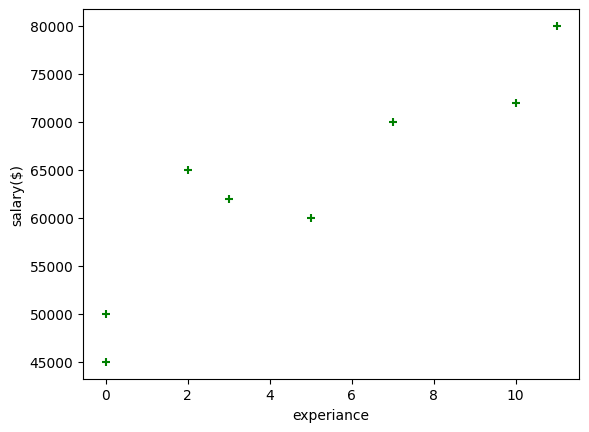

In [69]:
plt.xlabel("experiance")
plt.ylabel("salary($)")
plt.scatter(df.experience,df['salary($)'],color="green",marker="+")

In [70]:
reg = linear_model.LinearRegression()
reg.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])

LinearRegression()

In [71]:
reg.coef_

array([2922.26901502, 2221.30909959, 2147.48256637])

In [72]:
reg.intercept_

14992.65144669314

In [73]:
#for reg.predict([[2,9,6]])
2922.26901502*2+2221.30909959*9+2147.48256637*6+14992.65144669314

53713.86677126314

In [74]:
#with direct fun()
reg.predict([[2,9,6]])

C:\Users\sahua\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53713.86677124])

In [75]:
reg.predict([[12,10,10]])

C:\Users\sahua\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([93747.79628651])

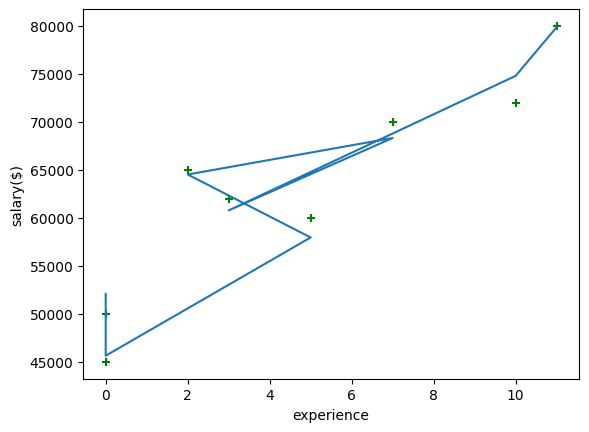

In [78]:
plt.xlabel("experience")
plt.ylabel("salary($)")
plt.scatter(df.experience,df['salary($)'],color="green",marker="+")
plt.plot(df.experience,reg.predict(df[['experience','test_score(out of 10)','interview_score(out of 10)']]))

In [17]:
x=np.array([1,2,3,4,5])
y=np.array([5,7,9,11,13])
def gradient_discent(x,y):
    m_cur=b_cur=0
    n=len(x)
    learning_rate=0.08
    # plt.scatter(x,y,color='red',marker='+',linewidth='5')
    for i in range(1000):
        y_predicted=m_cur*x+b_cur
        plt.plot(x,y_predicted,color='green')
        cost=(1/n)*sum([val**2 for val in (y-y_predicted)])
        md=-(2/n)*sum(x*(y-y_predicted))
        bd=-(2/n)*sum(y-y_predicted)
        m_cur=m_cur-learning_rate*md
        b_cur=b_cur-learning_rate*bd
        # print("m{},b{},cost{},iteration{}".format(m_cur,b_cur,cost,i))
gradient_discent(x,y)

(2.362701785260808, 6.50882692249878)

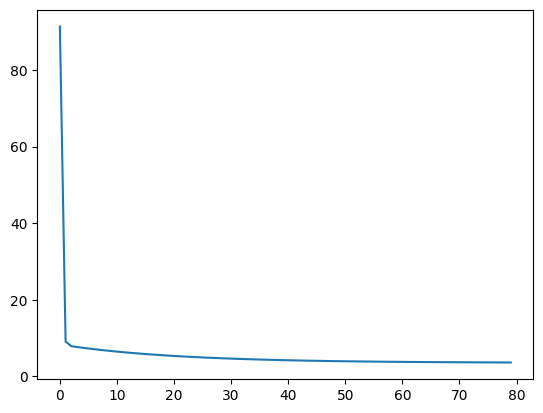

In [8]:
#or
import numpy as np
import matplotlib.pyplot as plt
def derv(x):
    return 2*x
def derv2var(x,y):
    learning_rate=0.1
    for i in range(16):
        x=x-derv(x)*learning_rate
        y=y-derv(y)*learning_rate
    return x,y
def grad_descent(x,y):
    m_cur=1
    c_cur=0
    n=len(x)
    learning_rate=0.1
    cur_error=0
    e=[]
    for i in range(80):
        y_predicted=m_cur*x+c_cur
        error=(1/n)*sum([val**2 for val in (y-y_predicted)])
        e.append(error)
        slope_der=-(2/n)*sum(x*(y-y_predicted))
        intercept_der=-(2/n)*sum(y-y_predicted)
        m_cur=m_cur-slope_der*learning_rate
        c_cur=c_cur-intercept_der*learning_rate
    plt.plot(e,)
    return m_cur,c_cur
x=np.array([1,2,3])
y=np.array([8,14,12])
grad_descent(x,y)

#### Linear Regression with normal equation

In [139]:
def add_bias(x):
    n=x.shape[0]
    x_b=np.concatenate((np.ones((n,1)),x),axis=1)
    return x_b

In [140]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
np.random.seed(0)
x=2*np.random.rand(100,1)
y=4+3*x+np.random.randn(100,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train_b=add_bias(x_train)
x_test_b=add_bias(x_test)

[[4.20634019]
 [2.9902591 ]]


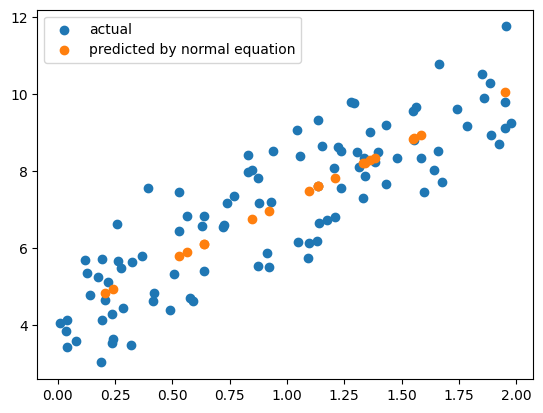

In [141]:
x_trans=np.transpose(x_train_b)
x_trans_x=np.dot(x_trans,x_train_b)
x_trans_y=np.dot(x_trans,y_train)
theta_norm=np.dot(np.linalg.inv(x_trans_x),x_trans_y)
print(theta_norm)
optimized_y_test_norm=[np.dot(x_test_b[i],theta_norm) for i in range(x_test.shape[0])]
plt.scatter(x,y,label='actual')
plt.scatter(x_test,optimized_y_test_norm,label='predicted by normal equation')
plt.legend()
plt.show()

### Multilinear regression

(2.3604003892276353, 3.1714612732096135, 2.3604003892276353)

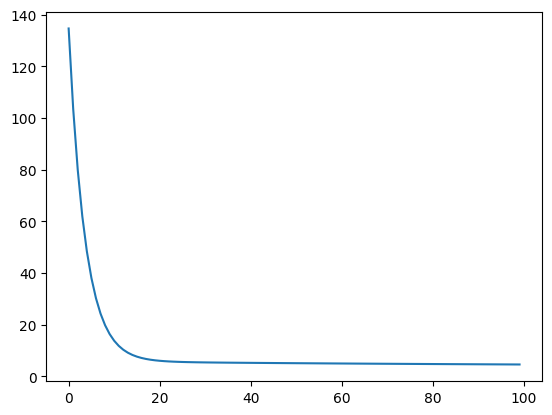

In [9]:
#type1 sol
def grad_descent(x1,x2,y):
    m1_cur=m2_cur=0
    c_cur=0
    n=len(x1)
    learning_rate=0.01
    e=[]
    for i in range(100):
        y_predicted=m1_cur*x1+m2_cur*x2+c_cur
        #print(y_predicted)
        error=(1/n)*sum([val**2 for val in (y-y_predicted)])
        e.append(error)
        slope_der1=-(2/n)*sum(x1*(y-y_predicted))
        slope_der2=-(2/n)*sum(x2*(y-y_predicted))
        intercept_der=-(2/n)*sum(y-y_predicted)
        m1_cur=m1_cur-slope_der1*learning_rate
        m2_cur=m2_cur-slope_der2*learning_rate
        c_cur=c_cur-intercept_der*learning_rate
    plt.plot(e,)
    return m1_cur,m2_cur,c_cur
x1=np.array([1,1,1])
x2=np.array([1,2,3])
y=np.array([8,14,12])
grad_descent(x1,x2,y)        

In [10]:
#type2 sol
def predict(x,theta):
    prediction=np.dot(x,theta)
    return prediction

In [11]:
def error(x,y,theta):
    return (y-predict(x,theta))
def costf(x,y,theta):
    e=0
    for i in range(len(x)):
        e=e+error(x[i],y[i],theta)**2
    return e/(2*len(x))

In [12]:
def gradient(x,y,theta):
    temp=[]
    for j in range(len(x[0])):
        theta_j=0
        for i in range(len(x)):
            theta_j=theta_j+(x[i][j]*error(x[i],y[i],theta))
        temp.append(theta_j)
    return temp

after 7  no. of iteration m:


array([[0.11064619],
       [0.43888205],
       [0.54952824]])

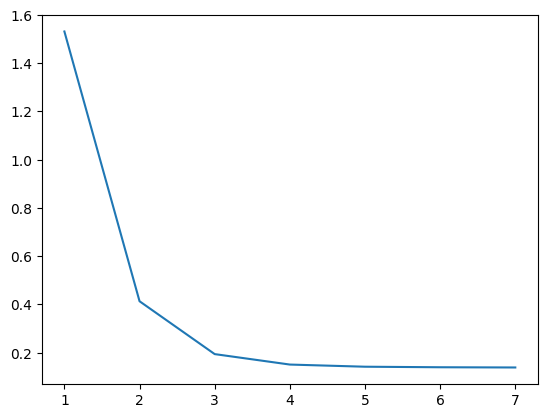

In [13]:
def grad_descent(x,y,theta):
    theta=np.zeros((len(x[0]),1))
    e=[]
    it=[]
    i=0
    prevc, curc=1, 0
    while abs(curc-prevc)>0.001:
        prevc=costf(x,y,theta)
        theta=theta+(np.array(gradient(x,y,theta))*0.01)
        curc=costf(x,y,theta)
        e.append(curc)
        i+=1
        it.append(i)
    print('after',i,' no. of iteration','m:')
    plt.plot(it,e)   
    return theta
x=[[1,2,3],[1,4,5]]
y=[2,5]
theta=[1,1,1]
grad_descent(x,y,theta)

In [14]:
#type3 sol using bias
def predict(x,theta):
    prediction=np.dot(x,theta)
    return prediction
def error(x,prediction,actual):
    e=0
    for i in range(len(prediction)):
        e=e+((prediction[i]-actual[i])**2)
    return e/(2*len(prediction))

In [15]:
def gradient(x,prediction,actual):
    length, var= x.shape
    temp=[]
    for j in range(var):
        theta_j=0
        for i in range(var):
            theta_j=theta_j+(prediction[i]-actual[i]*x[i][j])
        temp.append(theta_j/length)
    return temp
def add_bias(x):
    n=x.shape[0]
    x_b=np.concatenate((np.ones((n,1)),x),axis=1)
    return x_b

In [ ]:
from sklearn.model_selection import train_test_split
def grad_descent(x,y):
    n=x.shape[1]
    m=len(y)
    theta=np.zeros((n,1))
    learning_rate=0.001
    y_predicted=predict(x,theta)
    e=0
    prev_e=0
    error_diff=1
    error_eachstep=[]
    while error_diff>0.0001:
        y_predicted=predict(x,theta)
        prev_e=e
        e=error(x,y_predicted,y)
        error_eachstep.append(e)
        grad=gradient(x,y_predicted,y)
        theta=[theta[i]-learning_rate*grad[i] for i in range(n)]
        error_diff=abs(e-prev_e)
    plt.scatter(x,y)   
    plt.scatter(x,y_predicted)
    return theta,error_eachstep
np.random.seed(0)
x=2*np.random.rand(100,1)
y=4+3*x+np.random.randn(100,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train_b=add_bias(x_train)
x_test_b=add_bias(x_test)
theta,error_eachstep=grad_descent(x_train_b,y_train)
optimized_y_test=[np.dot(x_test_b[i],theta[0]) for i in range(x_test.shape[0])]
plt.scatter(x,y)

In [133]:
#with sklearn
x=np.random.rand(100,2)
y=np.dot(x, np.array([20,30]))+10
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [134]:
print(model.coef_, model.intercept_)

[20. 30.] 10.0


In [135]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [136]:
predict=model.predict(x_test)

In [137]:
model.score(x_test,y_test)

1.0

### polynomial regression

In [25]:
np.random.seed(0)
true_coef=[4,2,-3,5]
x=np.random.rand(100,1)
y=true_coef[0]*x**3+true_coef[1]*x**2+true_coef[2]*x+true_coef[3]
y+= np.random.normal(scale=0.5,size=y.shape)

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
deg=2
x_train_new=np.column_stack([x_train**i for i in range(deg+1)])
x_test_new=np.column_stack([x_test**i for i in range(deg+1)])
x_trans=np.transpose(x_train_new)
x_transX=np.dot(x_trans,x_train_new)
x_transY=np.dot(x_trans,y_train)
theta_normal=np.dot(np.linalg.inv(x_transX),x_transY)

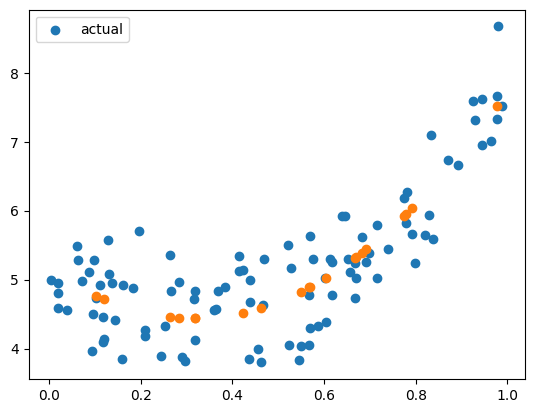

In [30]:
y_predicted=[np.dot(x_test_new[i],theta_normal) for i in range(x_test_new.shape[0])]
plt.scatter(x,y,label='actual')
plt.scatter(x_test,y_predicted)
plt.legend()
plt.show()

## Saving a model

In [26]:
import pickle
# from que1
with open('model_pickle','wb') as f:
    pickle.dump(reg,f)

In [27]:
with open('model_pickle','rb') as f:
    file=pickle.load(f)

In [28]:
file.coef_

array([828.46507522])

In [30]:
file.intercept_

-1632210.7578554575

In [32]:
file.predict([[1995]])

C:\Users\sahua\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([20577.06721385])

In [ ]:
#for large no. of numpy arrays use joblib
from sklearn.externals import joblib
joblib.dump(reg, 'model_joblib')
f=joblib.load('model_joblib')

## Categorical feature encoding

### OneHotEncoding

In [116]:
#que 3 predicting y if nominal catogary present
from sklearn import preprocessing
Ohe=preprocessing.OneHotEncoder()
df=pd.read_csv(r"C:\Users\sahua\OneDrive\Documents\Data Science\homeprices.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [117]:
#using get_dummies method
dummies=pd.get_dummies(df['town'])
dummies

,monroe township,robinsville,west windsor
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
5,False,False,True
6,False,False,True
7,False,False,True
8,False,False,True
9,False,True,False


In [118]:
merge=pd.concat([df,dummies],axis='columns')
merge

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,True,False,False
1,monroe township,3000,565000,True,False,False
2,monroe township,3200,610000,True,False,False
3,monroe township,3600,680000,True,False,False
4,monroe township,4000,725000,True,False,False
5,west windsor,2600,585000,False,False,True
6,west windsor,2800,615000,False,False,True
7,west windsor,3300,650000,False,False,True
8,west windsor,3600,710000,False,False,True
9,robinsville,2600,575000,False,True,False


In [119]:
final=merge.drop(['town','robinsville'],axis='columns')
final

,area,price,monroe township,west windsor
0,2600,550000,True,False
1,3000,565000,True,False
2,3200,610000,True,False
3,3600,680000,True,False
4,4000,725000,True,False
5,2600,585000,False,True
6,2800,615000,False,True
7,3300,650000,False,True
8,3600,710000,False,True
9,2600,575000,False,False


In [96]:
#using sklearn
x=Ohe.fit_transform(df.town.values.reshape(-1,1)).toarray()
x

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [86]:
df_OneHot=pd.DataFrame(x,columns=['town'+str(int(i)) for i in range(x.shape[1])],dtype='int64')
df=pd.concat([df,df_OneHot],axis=1)
df=df.drop(['town'],axis=1)
df

,area,price,town0,town1,town2
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,610000,1,0,0
3,3600,680000,1,0,0
4,4000,725000,1,0,0
5,2600,585000,0,0,1
6,2800,615000,0,0,1
7,3300,650000,0,0,1
8,3600,710000,0,0,1
9,2600,575000,0,1,0


In [120]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [122]:
x=final.drop(['price'],axis='columns')
x

,area,monroe township,west windsor
0,2600,True,False
1,3000,True,False
2,3200,True,False
3,3600,True,False
4,4000,True,False
5,2600,False,True
6,2800,False,True
7,3300,False,True
8,3600,False,True
9,2600,False,False


In [123]:
y=final.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [124]:
model.fit(x,y)

LinearRegression()

In [125]:
model.predict([[3200,0,1]])

C:\Users\sahua\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([655862.1801763])

In [126]:
model.predict([[3200,1,0]])

C:\Users\sahua\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([615848.20468716])

In [127]:
model.predict([[3200,0,0]])

C:\Users\sahua\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([641534.61621157])

In [128]:
model.score(x,y)

0.9573929037221872

### Label Encoder

In [48]:
#using sklearn pkg
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [49]:
dfle=df
dfle.town=label.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [50]:
label.fit_transform(dfle.town)

array([0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1], dtype=int64)

In [ ]:
data1=dfle['monroe township','west windsor']
label.transform(data1)
label.inverse_transform(dfle[0,1])

In [31]:
x=df[['town','area']].values
x

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [32]:
y=dfle.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(categorical_features=[0])

In [48]:
x=ohe.fit_transform(x).toarray()
x

array([[0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        0., 1., 1., 0., 1., 0., 1., 0.],
       [0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 0., 1., 1., 0.],
       [0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 0., 1., 1., 0., 1., 0.],
       [1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 

In [50]:
x=x[:,1:12]
x

array([[1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1.],
       [1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1.],
       [1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.],
       [0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1.],
       [0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1.],
       [0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.]])

In [51]:
model.fit(x,y)

LinearRegression()

In [ ]:
model.predict([[3200,0,0]])

### Feature scaling

In [129]:
data={'country':['india','usa','japan','china','india','usa'],'age':[44,34,46,35,23,50],'salary':[72000,65000,90000,60000,50000,80000]}
df=pd.DataFrame(data,columns=['country','age','salary'])
df

,country,age,salary
0,india,44,72000
1,usa,34,65000
2,japan,46,90000
3,china,35,60000
4,india,23,50000
5,usa,50,80000


In [130]:
df_scaled=df.copy()
min_max_normalizer=preprocessing.MinMaxScaler()
columns=['age','salary']
for i in columns:
    df_scaled[i]=min_max_normalizer.fit_transform(np.array(df_scaled[i]).reshape(-1,1))
df_scaled

,country,age,salary
0,india,0.777778,0.550
1,usa,0.407407,0.375
2,japan,0.851852,1.000
3,china,0.444444,0.250
4,india,0.000000,0.000
5,usa,1.000000,0.750


In [131]:
z_normalizer=preprocessing.StandardScaler()
columns=['age','salary']
for i in columns:
    df_scaled[i]=z_normalizer.fit_transform(np.array(df_scaled[i]).reshape(-1,1))
df_scaled

,country,age,salary
0,india,0.589368,0.191040
1,usa,-0.515697,-0.343872
2,japan,0.810380,1.566529
3,china,-0.405190,-0.725953
4,india,-1.731267,-1.490113
5,usa,1.252406,0.802369


In [132]:
maxabs=preprocessing.MaxAbsScaler()
columns=['age','salary']
for i in columns:
    df_scaled[i]=maxabs.fit_transform(np.array(df_scaled[i]).reshape(-1,1))
df_scaled

,country,age,salary
0,india,0.340426,0.121951
1,usa,-0.297872,-0.219512
2,japan,0.468085,1.000000
3,china,-0.234043,-0.463415
4,india,-1.000000,-0.951220
5,usa,0.723404,0.512195


In [58]:
#que 4
df=pd.read_csv(r"C:\Users\sahua\OneDrive\Documents\carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [60]:
dummies=pd.get_dummies(df['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
5,True,False,False
6,True,False,False
7,True,False,False
8,True,False,False
9,False,False,True


In [61]:
merge=pd.concat([df,dummies],axis='columns')
merge

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,False,True,False
1,BMW X5,35000,34000,3,False,True,False
2,BMW X5,57000,26100,5,False,True,False
3,BMW X5,22500,40000,2,False,True,False
4,BMW X5,46000,31500,4,False,True,False
5,Audi A5,59000,29400,5,True,False,False
6,Audi A5,52000,32000,5,True,False,False
7,Audi A5,72000,19300,6,True,False,False
8,Audi A5,91000,12000,8,True,False,False
9,Mercedez Benz C class,67000,22000,6,False,False,True


In [62]:
final=merge.drop(["Car Model","Mercedez Benz C class"],axis='columns')
final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,False,True
1,35000,34000,3,False,True
2,57000,26100,5,False,True
3,22500,40000,2,False,True
4,46000,31500,4,False,True
5,59000,29400,5,True,False
6,52000,32000,5,True,False
7,72000,19300,6,True,False
8,91000,12000,8,True,False
9,67000,22000,6,False,False


In [63]:
x=final.drop('Sell Price($)',axis='columns')
x

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,False,True
1,35000,3,False,True
2,57000,5,False,True
3,22500,2,False,True
4,46000,4,False,True
5,59000,5,True,False
6,52000,5,True,False
7,72000,6,True,False
8,91000,8,True,False
9,67000,6,False,False


In [64]:
y = final['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [65]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [66]:
#Price of mercedez benz that is 4 yr old with mileage 45000
model.predict([[45000,4,0,0]])

C:\Users\sahua\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [67]:
#Price of BMW X5 that is 7 yr old with mileage 86000
model.predict([[86000,7,0,1]])

C:\Users\sahua\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

In [68]:
#Price of audi that is 4 yr old with mileage 45000
model.predict([[45000,4,1,0]])

C:\Users\sahua\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([34537.77647335])

In [69]:
model.score(x,y)

0.9417050937281082

## Splittig data set into training set and test test

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
np.random.seed(0)
x=2*np.random.rand(100,1)
y=4+3*x+np.random.rand(100,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

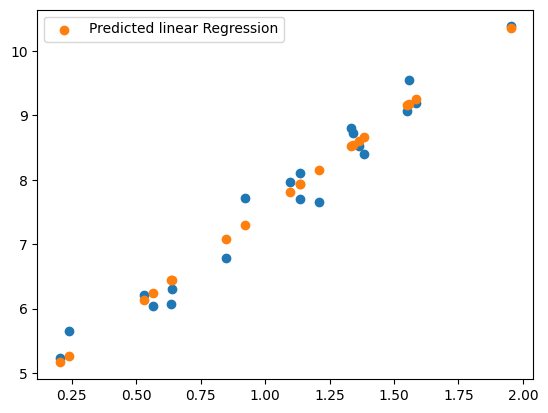

In [21]:
predict_y_test=[model.predict(np.array([x])) for x in x_test]
plt.scatter(x_test,y_test)
plt.scatter(x_test,predict_y_test,label="Predicted linear Regression")
plt.legend()

In [22]:
#using stratified
from sklearn.model_selection import StratifiedShuffleSplit
x=np.random.rand(100,2)
y=np.random.choice([0,1],100,p=[0.9,0.1])
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=5,stratify=y)
print("Original class distribution: ")
print(f"Class 0: {np.sum(y==0)}, class 1: {np.sum(y==1)}\n")

print("Training set Class distribution: ")
print(f"Class 0: {np.sum(y_train==0)}, class 1: {np.sum(y_train==1)}\n")

print("Test set class distribution: ")
print(f"Class 0: {np.sum(y_test==0)}, class 1: {np.sum(y_test==1)}\n")

Original class distribution: 
Class 0: 84, class 1: 16

Training set Class distribution: 
Class 0: 59, class 1: 11

Test set class distribution: 
Class 0: 25, class 1: 5



In [23]:
#splitting datasets into validation set
x_train,x_temp,y_train,y_temp=train_test_split(x,y,train_size=0.6,random_state=5,stratify=y)
x_test,x_val,y_test,y_val=train_test_split(x_temp,y_temp,train_size=0.5,random_state=5,stratify=y_temp)
print("Original class distribution: ")
print(f"Class 0: {np.sum(y==0)}, class 1: {np.sum(y==1)}\n")

print("Training set Class distribution: ")
print(f"Class 0: {np.sum(y_train==0)}, class 1: {np.sum(y_train==1)}\n")

print("Validation set Class distribution: ")
print(f"Class 0: {np.sum(y_val==0)}, class 1: {np.sum(y_val==1)}\n")

print("Test set class distribution: ")
print(f"Class 0: {np.sum(y_test==0)}, class 1: {np.sum(y_test==1)}\n")

Original class distribution: 
Class 0: 84, class 1: 16

Training set Class distribution: 
Class 0: 50, class 1: 10

Validation set Class distribution: 
Class 0: 17, class 1: 3

Test set class distribution: 
Class 0: 17, class 1: 3



In [24]:
#using stratifiedkfold to split the datasets into k no. of folds
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=3,shuffle=True, random_state=5)
for i, (train_index, val_index) in enumerate(skf.split(x,y)):
    x_train, x_val=x[train_index], x[val_index]
    y_train, y_val=y[train_index], y[val_index]
    print(f"Fold {i}: ")
    print(f"  Train: index={train_index}")
    print(f"  Test: index={val_index}")

Fold 0: 
  Train: index=[ 0  1  3  4  5  7 10 11 12 16 17 18 19 23 24 27 29 30 31 32 35 36 37 38
 39 40 41 42 45 46 48 50 51 52 53 54 56 57 58 60 61 62 63 64 65 67 71 72
 73 74 75 78 79 80 83 84 85 86 87 88 89 92 94 96 98 99]
  Test: index=[ 2  6  8  9 13 14 15 20 21 22 25 26 28 33 34 43 44 47 49 55 59 66 68 69
 70 76 77 81 82 90 91 93 95 97]
Fold 1: 
  Train: index=[ 0  2  5  6  8  9 13 14 15 16 17 20 21 22 24 25 26 27 28 29 31 33 34 38
 41 43 44 45 46 47 48 49 50 52 53 55 59 61 63 66 67 68 69 70 71 72 74 75
 76 77 78 79 81 82 83 85 87 88 90 91 93 94 95 96 97 98 99]
  Test: index=[ 1  3  4  7 10 11 12 18 19 23 30 32 35 36 37 39 40 42 51 54 56 57 58 60
 62 64 65 73 80 84 86 89 92]
Fold 2: 
  Train: index=[ 1  2  3  4  6  7  8  9 10 11 12 13 14 15 18 19 20 21 22 23 25 26 28 30
 32 33 34 35 36 37 39 40 42 43 44 47 49 51 54 55 56 57 58 59 60 62 64 65
 66 68 69 70 73 76 77 80 81 82 84 86 89 90 91 92 93 95 97]
  Test: index=[ 0  5 16 17 24 27 29 31 38 41 45 46 48 50 52 53 61 63 67 71 72 74 

In [ ]:
#using stratifiedkfold to split the datasets in  9:1 ratio(if 10 example set are there) else there will be only 1 data in test set.
from sklearn.model_selection import LeaveOneOut
loo=LeaveOneOut()
for i, (train_index, val_index) in enumerate(loo.split(x)):
    x_train, x_val=x[train_index], x[val_index]
    y_train, y_val=y[train_index], y[val_index]
    print(f"Fold {i}: ")
    print(f"  Train: index={train_index}")
    print(f"  Test: index={val_index}")

In [48]:
#que2
df=pd.read_csv(r"C:\Users\sahua\OneDrive\Documents\Data Science\trainTest.csv")
df.head()

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500


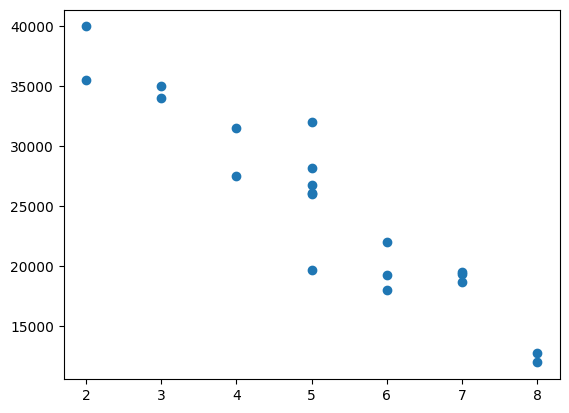

In [50]:
plt.scatter(df['Age(yrs)'],df['Sell Price($)'])

In [51]:
x = df[['Mileage','Age(yrs)']]
y = df['Sell Price($)']

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10) 

In [53]:
x_train  #size=16(80%)

,Mileage,Age(yrs)
3,22500,2
18,87600,8
13,58780,4
2,57000,5
14,82450,7
8,91000,8
17,69000,5
16,28000,2
19,52000,5
12,59000,5


In [54]:
from sklearn.linear_model import LinearRegression
train = LinearRegression()
train.fit(x_train, y_train)

LinearRegression()

In [55]:
train.predict([[90000,7]])

C:\Users\sahua\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14328.80551641])

In [56]:
train.score(x_test, y_test)

0.733233959309014

## Logistic regression

In [1]:
import numpy as np
def sigmoid(z):
    g= 1.0/(1.0+np.exp(-z))
    return g
sigmoid(1)

0.7310585786300049

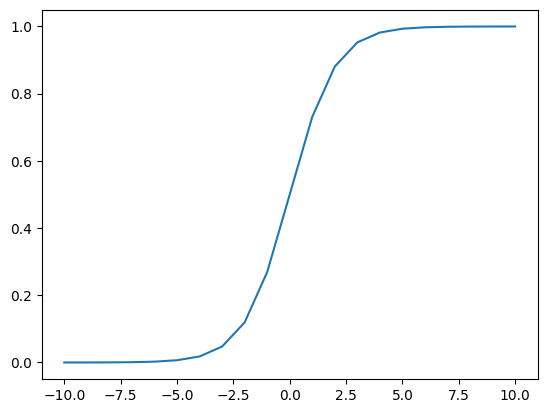

In [2]:
import matplotlib.pyplot as plt
x=np.arange(-10,11)
y=sigmoid(x)
plt.plot(x,y)

In [3]:
def predict_linear(x,w,b):
    return x @ w + b
def predict_logistic(x,w,b):
    z=x @ w + b
    return sigmoid(z)
x=np.array([[0.5,1.5],[1,2],[0.1,0.1],[3,0.5],[2,2],[1,2.5]])
w=np.array([1,1])
b=np.array([-1])
print(x @ w + b)
predict_logistic(x,w,b)

[ 1.   2.  -0.8  2.5  3.   2.5]


array([0.73105858, 0.88079708, 0.31002552, 0.92414182, 0.95257413,
       0.92414182])

In [4]:
def cost_logistic(x,y,w,b):
    m=x.shape[0]
    cost = 0
    for i in range(m):
        z_i=np.dot(x[i],w) + b
        f_wb_i=sigmoid(z_i)
        cost += -y[i]*np.log(f_wb_i)-(1-y[i])*np.log(1-f_wb_i)
    cost=cost/m
    return cost
y=np.array([0,0,0,1,1,1])
cost_logistic(x,y,w,b)

array([0.66960953])

In [5]:
def gradient_logistic(x,y,w,b):
    m,n=x.shape
    dj_dw=np.zeros((n,))
    dj_db=0.0
    for i in range(m):
        z_i=np.dot(x[i],w) + b
        f_wb_i=sigmoid(z_i)
        err_i=f_wb_i-y[i]
        for j in range(n):
            dj_dw[j] += err_i*x[i,j]
        dj_db += err_i
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    return dj_dw, dj_db
x=np.array([[0.5,1.5],[1,2],[0.1,0.1],[3,0.5],[2,2],[1,2.5]])
y=np.array([0,0,0,1,1,1])
w=np.array([1,1])
b=np.array([-1])
m,n = x.shape
print(m,n)
dj_dw, dj_db=gradient_logistic(x,y,w,b)
print(dj_dw)
print(dj_db)

6 2
[0.14650741 0.42779305]
[0.28712316]


C:\Users\sahua\AppData\Local\Temp\ipykernel_14768\92843504.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j] += err_i*x[i,j]


In [6]:
def gradientDescent_logistic(x,y,w_in,b_in,alpha,niter):
    w=w_in
    b=b_in
    j_hist=[]
    for i in range(niter):
        dj_dw, dj_db=gradient_logistic(x,y,w,b)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
        if i<100000:
            j_hist.append(gradient_logistic(x,y,w,b))
        if i%1000 ==0:
            print("iteration",i, "cost",j_hist[-1])
    return w,b,j_hist
x=np.array([[0.5,1.5],[1,1],[1.5,0.5],[3,0.5],[2,2],[1,2.5]])
y=np.array([0,0,0,1,1,1])
w=np.zeros_like(x[0])
b=0.
w,b,j_hist=gradientDescent_logistic(x,y,w,b,0.1,10000)
print("w: ",w," b: ",b)

iteration 0 cost (array([-0.22449108, -0.14601523]), 0.014924742767851254)
iteration 1000 cost (array([-0.01154724, -0.01179442]), 0.03292263785587346)
iteration 2000 cost (array([-0.00639134, -0.0064637 ]), 0.017933890941894477)
iteration 3000 cost (array([-0.00437133, -0.00440444]), 0.01219290340280725)
iteration 4000 cost (array([-0.00331049, -0.00332914]), 0.009205288270528337)
iteration 5000 cost (array([-0.00266019, -0.00267204]), 0.007382936755160792)
iteration 6000 cost (array([-0.00222181, -0.00222997]), 0.006158304660621156)
iteration 7000 cost (array([-0.00190669, -0.00191261]), 0.005279886586599484)
iteration 8000 cost (array([-0.00166943, -0.00167391]), 0.004619558128642703)
iteration 9000 cost (array([-0.00148444, -0.00148794]), 0.0041053232770014575)
w:  [5.28123029 5.07815608]  b:  -14.222409982019837


In [7]:
x @ w + b

array([-3.96456072, -3.86302362, -3.76148651,  4.16035893,  6.49636275,
        3.7542105 ])

In [2]:
#que1
df=pd.read_csv(r"C:\Users\sahua\OneDrive\Documents\Data Science\insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


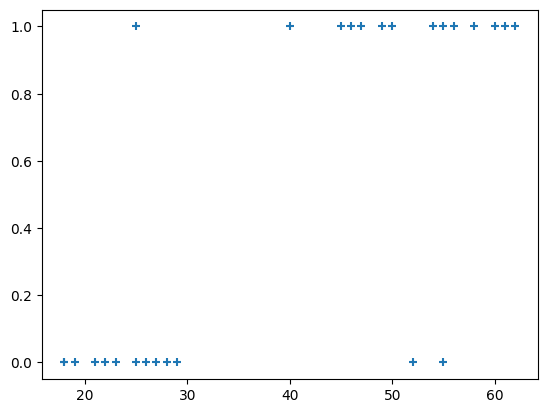

In [3]:
plt.scatter(df.age,df.bought_insurance,marker="+")

In [8]:
x=df[['age']]
y=df.bought_insurance

In [4]:
reg= linear_model.LinearRegression()
reg.fit(df[["age"]],df.bought_insurance)

LinearRegression()

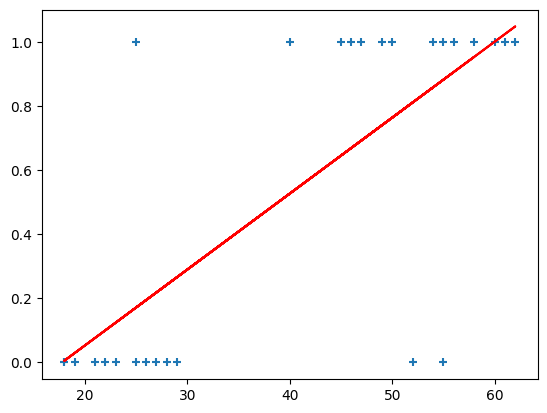

In [7]:
plt.scatter(df.age,df.bought_insurance,marker="+")
plt.plot(df.age,reg.predict(df[['age']]),color="red")

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10) 

In [10]:
x_test

,age
7,60
5,56
18,19
21,26
11,28
1,25


In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [12]:
model.predict(x_test)

array([1, 1, 0, 0, 0, 0], dtype=int64)

In [13]:
model.predict_proba(x_test)

array([[0.07149837, 0.92850163],
       [0.10786034, 0.89213966],
       [0.88695424, 0.11304576],
       [0.78083769, 0.21916231],
       [0.73981335, 0.26018665],
       [0.79952571, 0.20047429]])

In [16]:
model.predict([[20]])

C:\Users\sahua\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [17]:
model.predict([[45]])

C:\Users\sahua\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [18]:
model.predict([[50]])

C:\Users\sahua\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [19]:
model.score(x_test,y_test)

1.0

In [29]:
model.coef_

array([[0.112778]])

In [30]:
model.intercept_

array([-4.20278276])

In [31]:
#Lets defined sigmoid function now and do the math with hand
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))
def prediction_function(age):
    z = 0.113 * age - 4.20
    y = sigmoid(z)
    return y
prediction_function(50) #0.81 is more than 0.5 which means person with 50 will buy the insurance

0.8099984339846871

In [14]:
#que2
df=pd.read_csv(r"C:\Users\sahua\OneDrive\Documents\Data Science\HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [15]:
left = df[df.left==1]
retained=df[df.left==0]
retained.shape

(11428, 10)

<Axes: xlabel='salary'>

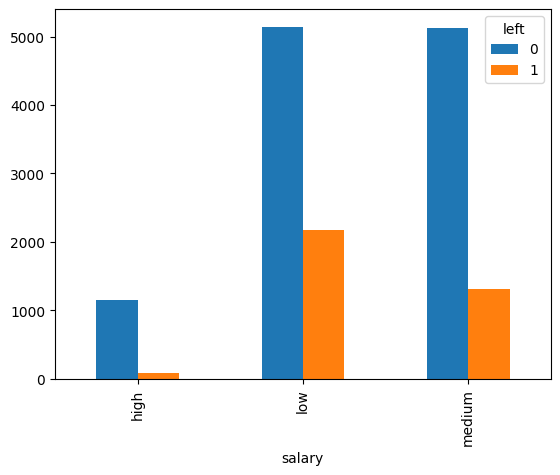

In [16]:
#Impact of salary on employee retention
pd.crosstab(df.salary,df.left).plot(kind='bar') #shows employees with high salaries are likely to not leave the company

<Axes: xlabel='Department'>

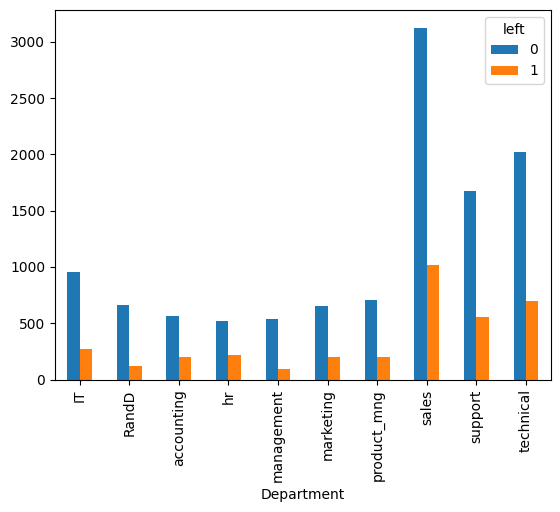

In [17]:
#Department wise employee retention rate
pd.crosstab(df.Department,df.left).plot(kind='bar') 

In [18]:
#we will use following variables as independant variables in our model
indvar = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
indvar.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [19]:
dummies = pd.get_dummies(indvar.salary, prefix="salary")
df_dummies = pd.concat([indvar,dummies],axis='columns')
df_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False


In [20]:
df_dummies.drop('salary',axis='columns',inplace=True)
df_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [21]:
x = df_dummies
y=df.left

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.3)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [23]:
model.predict([[0.7,200,0,1,0,0]])

C:\Users\sahua\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [24]:
model.predict([[0.3,200,0,0,0,1]])

C:\Users\sahua\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [25]:
model.predict([[0.75,130,1,0,0,1]])

C:\Users\sahua\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [26]:
model.score(x_test,y_test)

0.7781904761904762

#### Number recognition

In [27]:
from sklearn.datasets import load_digits
digits=load_digits()

In [28]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [29]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

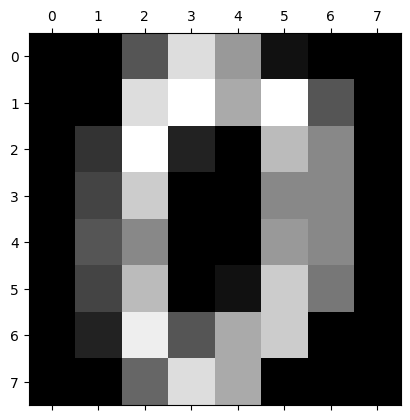

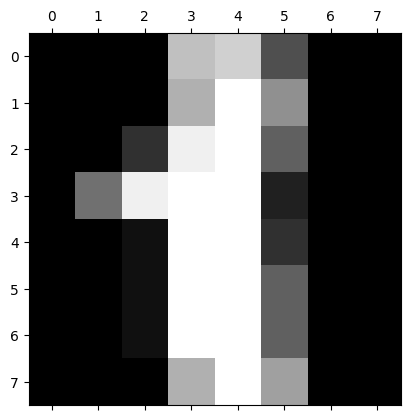

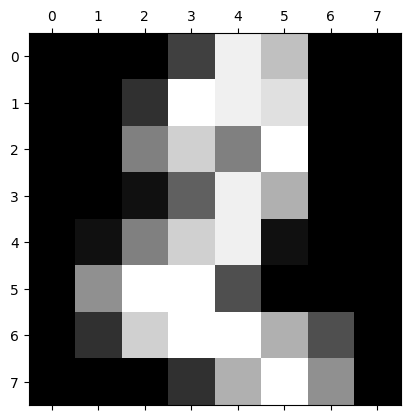

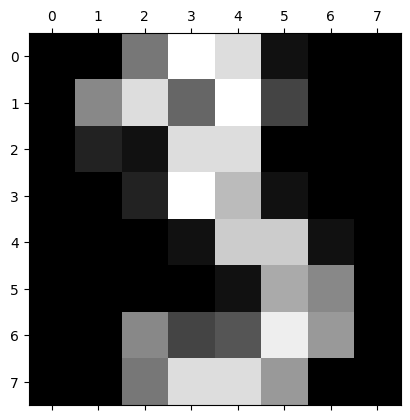

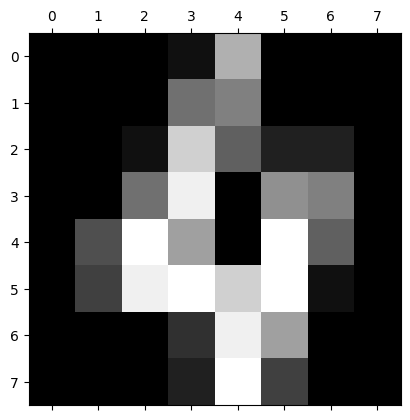

In [30]:
plt.gray() 
for i in range(5):
    plt.matshow(digits.images[i]) 

In [34]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2)
len(x_train)

1437

In [40]:
model = LogisticRegression()
model.fit(x_train,y_train)

C:\Users\sahua\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
model.score(x_test,y_test)

0.975

#### Confusion matrix

In [45]:
y_predicted = model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[41,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 44,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 24,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2, 36,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 31,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 32,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0, 26,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 31]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

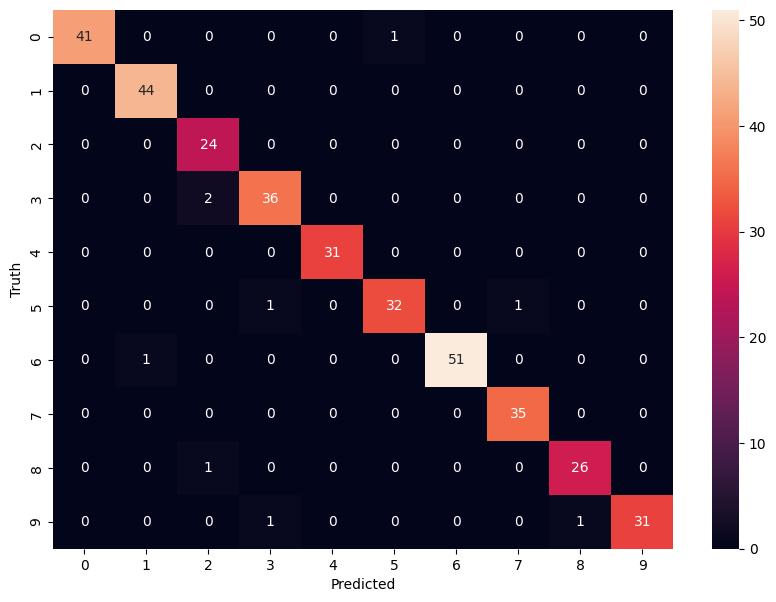

In [47]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### logistic regression on iris data set

In [8]:
from sklearn.datasets import load_iris
iris=load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [9]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
from sklearn.model_selection import train_test_split
x=iris.data[['petal width (cm)']].values
np.transpose(x)

array([[0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
        0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
        0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
        0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
        1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
        1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
        1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
        1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
        2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
        2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
        1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
        2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8]])

In [14]:
from sklearn.linear_model import LogisticRegression
y=iris.target_names[iris.target]=='virginica'
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=7)
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [16]:
x_new=np.linspace(0,3,1000).reshape(-1,1)
y_proba=model.predict_proba(x_new)
decision_boundary=x_new[y_proba[:,1]>=0.5][0,0]
decision_boundary

1.6636636636636637

In [17]:
model.predict([[1.4],[1.5]])

array([False, False])

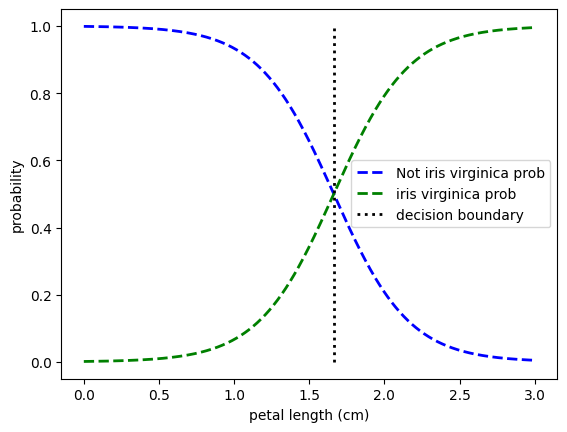

In [28]:
import matplotlib.pyplot  as plt
plt.plot(x_new,y_proba[:,0],"b--",linewidth=2, label="Not iris virginica prob")
plt.plot(x_new,y_proba[:,1],"g--",linewidth=2, label="iris virginica prob")
plt.plot([decision_boundary,decision_boundary],[0,1],"k:",linewidth=2, label="decision boundary")
plt.xlabel("petal length (cm)")
plt.ylabel("probability")
plt.legend()
plt.show()

### cross_val_score function

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
digits = load_digits()

In [42]:
score1=cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digits.data, digits.target,cv=3)
score1

array([0.89482471, 0.95325543, 0.90984975])

In [43]:
import numpy as np
np.average(score1)

0.9193099610461881

In [45]:
score2=cross_val_score(RandomForestClassifier(n_estimators=30),digits.data, digits.target,cv=10)
score2

array([0.92222222, 0.96666667, 0.93333333, 0.92777778, 0.96666667,
       0.97222222, 0.97222222, 0.96089385, 0.9273743 , 0.93854749])

In [46]:
np.average(score2)

0.948792675356921

### KNN classification

In [30]:
import pandas as pd
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [32]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [33]:
df[47:52]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor


In [34]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

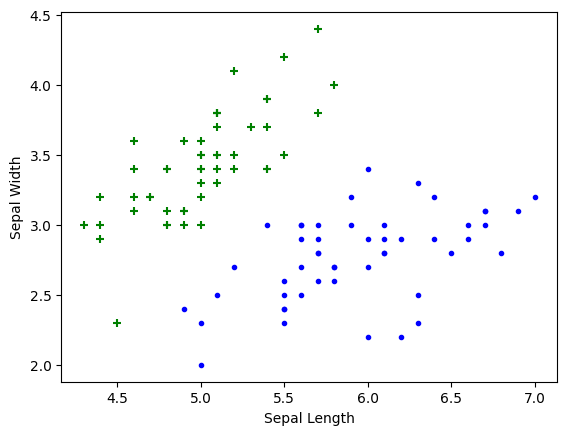

In [35]:
#Sepal length vs Sepal Width (Setosa vs Versicolor)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
x = df.drop(['target','flower_name'], axis='columns')
y = df.target
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [38]:
knn.predict([[4.8,3.0,1.5,0.3]])

C:\Users\sahua\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [39]:
knn.score(X_test, y_test)

0.9666666666666667

In [40]:
#Print classification report for precesion, recall and f1-score for each classes
from sklearn.metrics import classification_report
y_pred=knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



### Naive baye's

In [17]:
#que1
import pandas as pd
df = pd.read_csv(r"C:\Users\sahua\OneDrive\Documents\Data Science\titanic.csv")
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [18]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [19]:
x = df.drop('Survived',axis='columns')
y = df.Survived
dummies = pd.get_dummies(x.Sex)
dummies.head(3)

,female,male
0,False,True
1,True,False
2,True,False


In [20]:
x = pd.concat([x,dummies],axis='columns')
x.drop(['Sex'],axis='columns',inplace=True)
x.head(3)

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,False,True
1,1,38.0,71.2833,True,False
2,3,26.0,7.9250,True,False


In [21]:
x.isna().any()

Pclass    False
Age        True
Fare      False
female    False
male      False
dtype: bool

In [22]:
x.Age = x.Age.fillna(x.Age.mean())
x.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,False,True
1,1,38.0,71.2833,True,False
2,3,26.0,7.9250,True,False
3,1,35.0,53.1000,True,False
4,3,35.0,8.0500,False,True


In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [25]:
model.predict([[3,20,7,0,1]])

C:\Users\sahua\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [26]:
model.predict(x_test[0:10])

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [27]:
model.score(x_test,y_test)

0.7985074626865671

In [28]:
model.predict_proba(x_test[:10])

array([[0.89090111, 0.10909889],
       [0.0355129 , 0.9644871 ],
       [0.02754899, 0.97245101],
       [0.98872822, 0.01127178],
       [0.9886969 , 0.0113031 ],
       [0.90787179, 0.09212821],
       [0.0839236 , 0.9160764 ],
       [0.98873655, 0.01126345],
       [0.98829716, 0.01170284],
       [0.97325942, 0.02674058]])

In [29]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),x_train, y_train, cv=5)

array([0.744     , 0.808     , 0.776     , 0.76612903, 0.76612903])

In [30]:
#que2
df = pd.read_csv(r"C:\Users\sahua\OneDrive\Documents\Data Science\spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
df.groupby("Category").describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [32]:
df['spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.Message,df.spam)
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
x_train_count = v.fit_transform(x_train.values)
x_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [34]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train_count,y_train)

MultinomialNB()

In [35]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)

In [36]:
x_test_count = v.transform(x_test)
model.score(x_test_count, y_test)

0.9827709978463748

#### Sklearn pipeline

In [37]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [38]:
clf.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [39]:
clf.score(x_test,y_test)

0.9827709978463748

### Decision Tree

In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\sahua\OneDrive\Documents\Data Science\salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [2]:
from sklearn.preprocessing import LabelEncoder
x = df.drop('salary_more_then_100k',axis='columns')
y = df['salary_more_then_100k']
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [3]:
x['company_n'] = le_company.fit_transform(x['company'])
x['job_n'] = le_job.fit_transform(x['job'])
x['degree_n'] = le_degree.fit_transform(x['degree'])
x

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [5]:
x_n = x.drop(['company','job','degree'],axis='columns')
x_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [6]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_n, y)

DecisionTreeClassifier()

In [7]:
model.predict([[2,1,0]])

C:\Users\sahua\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [8]:
model.predict([[2,1,1]])

C:\Users\sahua\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [10]:
model.score(x_n,y)

1.0

### Support vector machine

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [5]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

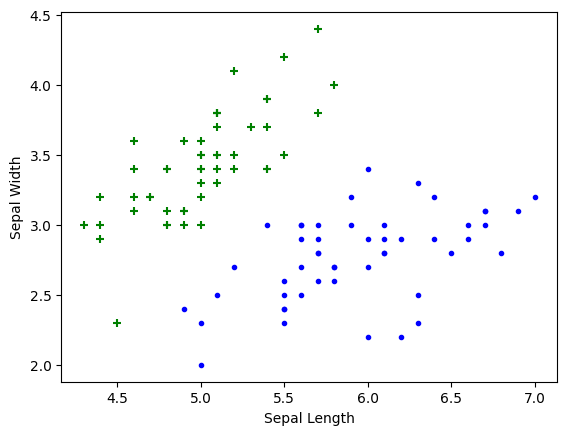

In [6]:
#Sepal length vs Sepal Width (Setosa vs Versicolor)
import matplotlib.pyplot as plt
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

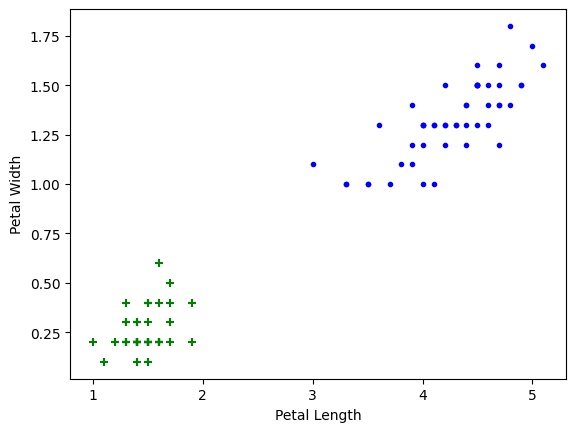

In [7]:
#Petal length vs Pepal Width (Setosa vs Versicolor)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

In [8]:
from sklearn.model_selection import train_test_split
x = df.drop(['target','flower_name'], axis='columns')
y = df.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [10]:
len(x_train)

120

In [11]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)

SVC()

In [12]:
model.predict([[4.8,3.0,1.5,0.3]])

C:\Users\sahua\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [13]:
model.score(x_test, y_test)

0.9333333333333333

#### Tune parameters

In [15]:
#Regularization (C)
model_C = SVC(C=10)
model_C.fit(x_train, y_train)
model_C.score(x_test, y_test)

1.0

In [16]:
#Gamma
model_g = SVC(gamma=10)
model_g.fit(x_train, y_train)
model_g.score(x_test, y_test)

0.9666666666666667

In [17]:
#Kernel
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(x_train, y_train)
model_linear_kernal.score(x_test, y_test)

0.9666666666666667

### RandomForest

In [18]:
from sklearn.datasets import load_digits
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

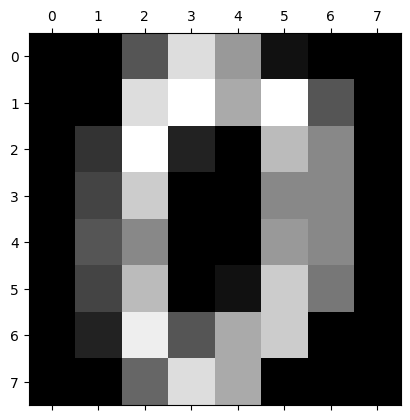

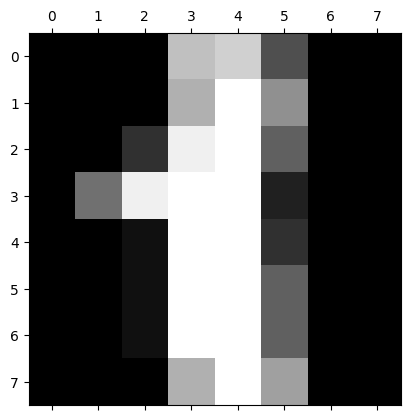

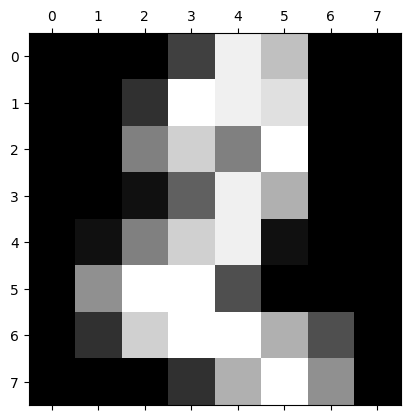

In [19]:
import matplotlib.pyplot as plt
plt.gray() 
for i in range(3):
    plt.matshow(digits.images[i]) 

In [20]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [22]:
df['target'] = digits.target
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [23]:
from sklearn.model_selection import train_test_split
x = df.drop('target',axis='columns')
y = df.target
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [24]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20)

In [26]:
y_predicted = model.predict(x_test)
y_predicted

array([1, 9, 3, 0, 1, 0, 4, 4, 8, 9, 8, 5, 0, 5, 9, 4, 0, 0, 6, 4, 0, 2,
       7, 6, 0, 1, 2, 0, 8, 1, 0, 9, 9, 4, 0, 5, 6, 5, 5, 3, 8, 5, 2, 9,
       6, 0, 5, 4, 4, 1, 3, 6, 5, 3, 9, 8, 6, 8, 1, 4, 2, 0, 9, 3, 6, 5,
       9, 8, 7, 1, 1, 9, 4, 7, 5, 0, 6, 0, 0, 6, 1, 9, 5, 3, 7, 0, 3, 1,
       3, 3, 6, 6, 3, 5, 9, 6, 3, 8, 9, 2, 5, 3, 0, 0, 8, 6, 6, 7, 9, 8,
       4, 4, 7, 1, 5, 4, 0, 2, 1, 9, 3, 6, 7, 2, 7, 6, 6, 3, 3, 7, 9, 3,
       4, 4, 8, 5, 7, 9, 1, 1, 9, 2, 4, 2, 3, 4, 0, 2, 0, 1, 3, 6, 7, 5,
       3, 4, 1, 6, 5, 3, 8, 0, 1, 7, 4, 9, 3, 4, 3, 1, 4, 3, 2, 3, 5, 2,
       5, 2, 5, 3, 3, 9, 4, 0, 4, 5, 2, 4, 8, 4, 6, 7, 0, 9, 5, 5, 1, 2,
       3, 5, 9, 3, 8, 7, 5, 5, 9, 6, 8, 7, 1, 0, 1, 4, 6, 4, 2, 3, 9, 8,
       9, 1, 7, 5, 8, 2, 5, 9, 5, 2, 2, 4, 6, 5, 1, 6, 0, 0, 9, 1, 2, 8,
       8, 6, 8, 1, 9, 3, 1, 3, 2, 5, 1, 4, 6, 7, 9, 9, 3, 0, 0, 8, 8, 8,
       0, 2, 4, 1, 4, 3, 5, 1, 3, 8, 6, 0, 4, 0, 9, 6, 4, 8, 7, 4, 7, 9,
       4, 7, 3, 2, 3, 1, 4, 8, 1, 1, 5, 8, 6, 5, 3,

In [27]:
model.score(x_test, y_test)

0.9722222222222222

Text(95.72222222222221, 0.5, 'Truth')

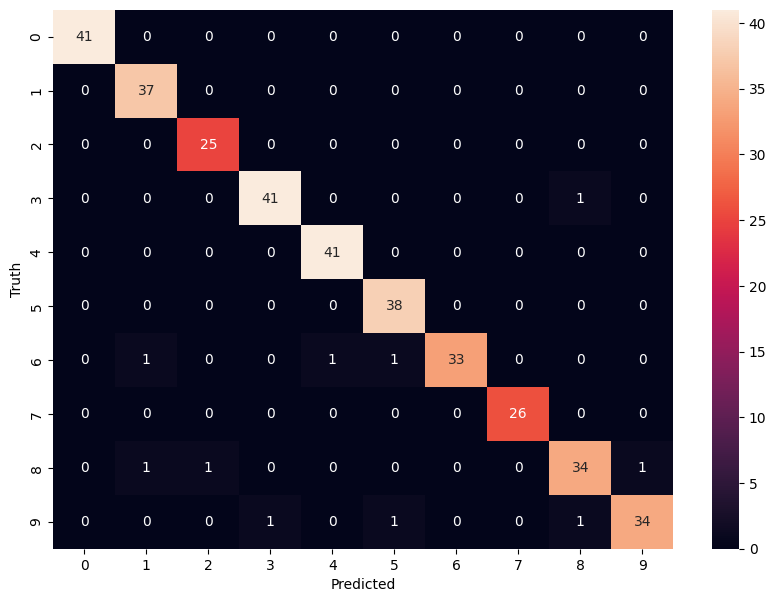

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### KMeans clustering

In [32]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [33]:
df = pd.read_csv(r"C:\Users\sahua\OneDrive\Documents\Data Science\income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

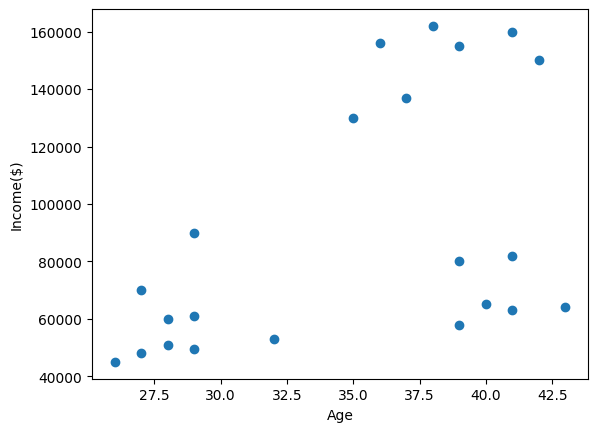

In [34]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [35]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [36]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


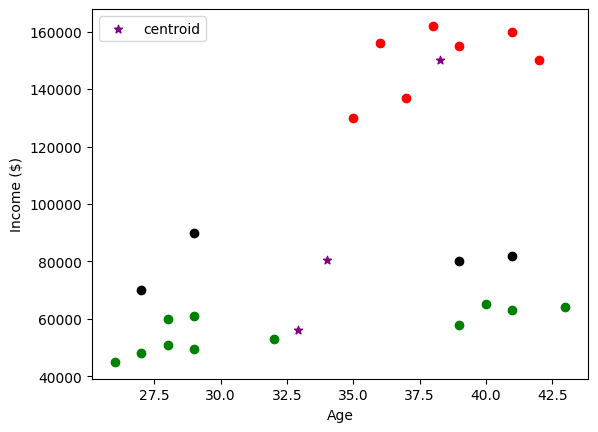

In [37]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [38]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


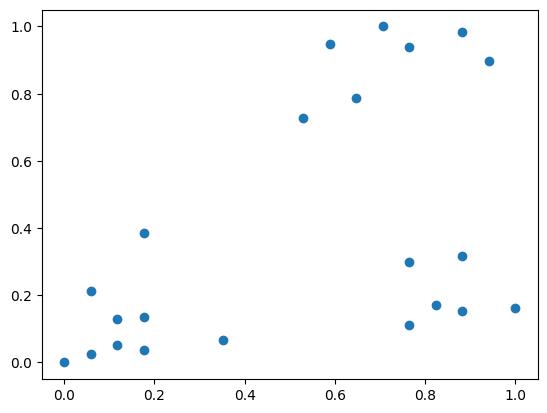

In [39]:
plt.scatter(df.Age,df['Income($)'])

In [40]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


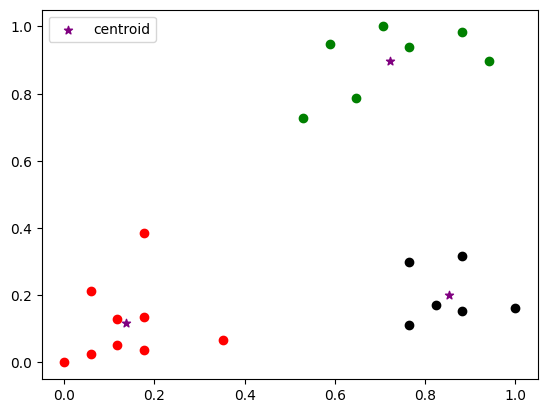

In [41]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [42]:
#Elbow plot
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

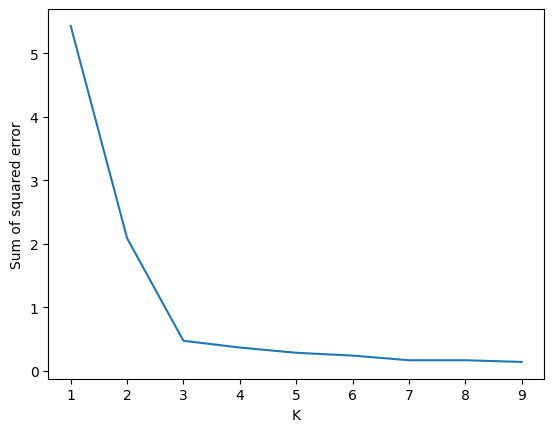

In [43]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)